# Worksheet 

[QUIZZ](https://forms.gle/RRf5HVH7Vw5xhwAx8)

### Kmeans ++

a) What's the main limitation of Farthest First Traversal?

Initialize with outliers or noise, resulting in poor partitioning.

b) What is the difference between K means and K means ++?

K means ++ selects the next centroid with probability proportional to the square of the distance from the nearest centroid, making points farther from the centroids more likely to be selected.

c) What are some limitations of Kmeans/ Kmeans++?

need to specify number of cluster in advance; depends on initial centroids and sensitive to outliers; may converge to local optima.

d) Explain why we need silhouette scores

measure the quality of clustering and help select number of clustering: how similar points in their assigned cluster and how dissimilar points in different clusters.

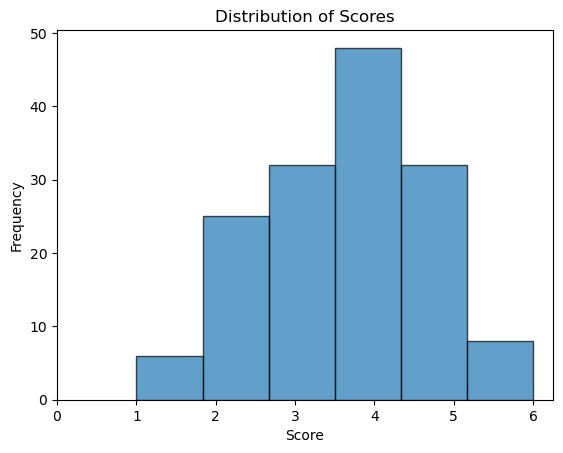

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./quizz1_scores.csv")
df[['score', 'total']] = df['Scores'].str.split('/', expand=True).astype(float)

plt.hist(df['score'], bins=6, edgecolor='black', alpha=0.7)
plt.xticks(range(7))
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribution of Scores")
plt.show()

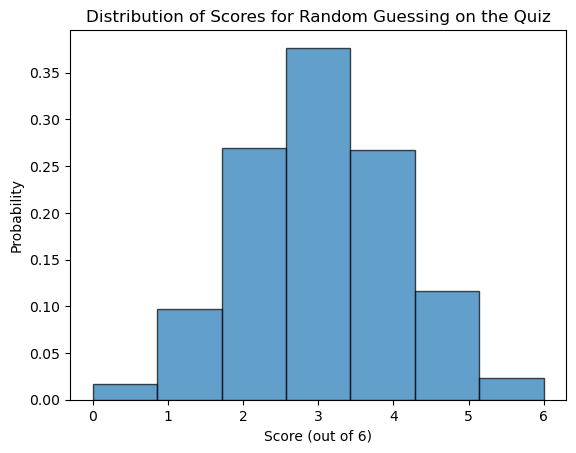

In [2]:
import numpy as np

num_questions = 6
true_answers = ['T', 'F', 'F', 'T', 'T', 'T']
num_simulations = 1000

scores = []
for _ in range(num_simulations):
    guesses = np.random.choice(['T', 'F'], size=num_questions)
    score = sum(guesses == np.array(true_answers))
    scores.append(score)

plt.hist(scores, bins=7, edgecolor='black', alpha=0.7, density=True)
plt.xticks(range(num_questions+1))
plt.xlabel("Score (out of 6)")
plt.ylabel("Probability")
plt.title("Distribution of Scores for Random Guessing on the Quiz")
plt.show()

3.6556291390728477
3.05


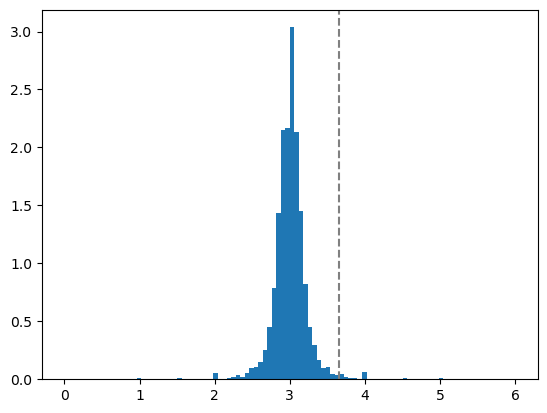

In [3]:
print(df['score'].mean())
print(np.mean(np.array(scores)))

num_questions = 6
true_answers = ['T', 'F', 'F', 'T', 'T', 'T']
num_simulations = 1000
class_size = 151

avg_scores = []
for _ in range(num_simulations):
    scores = []
    for _ in range(class_size):
        guesses = np.random.choice(['T', 'F'], size=num_questions)
        score = sum(guesses == np.array(true_answers))
        scores.append(score)
        avg_scores.append(np.mean(np.array(scores)))

plt.hist(avg_scores, bins=100, density=True)
plt.axvline(df['score'].mean(), color='grey', linestyle='dashed')
plt.show()

In [4]:
num_questions = 6
true_answers = ['T', 'F', 'F', 'T', 'T', 'T']
num_simulations = 1000
class_size = 151

num_times_random_beats_class = 0
for _ in range(num_simulations):
    scores = []
    for _ in range(class_size):
        guesses = np.random.choice(['T', 'F'], size=num_questions)
        score = sum(guesses == np.array(true_answers))
        scores.append(score)
        if np.mean(np.array(scores)) > df['score'].mean():
            num_times_random_beats_class += 1

print(f'Out of {num_simulations}, random beat the class {num_times_random_beats_class}. Or {num_times_random_beats_class / num_simulations} % of the time')

Out of 1000, random beat the class 1672. Or 1.672 % of the time


c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


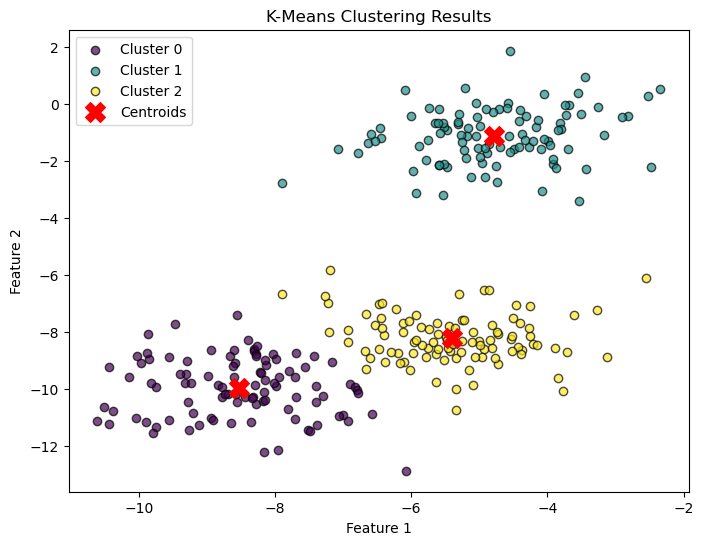

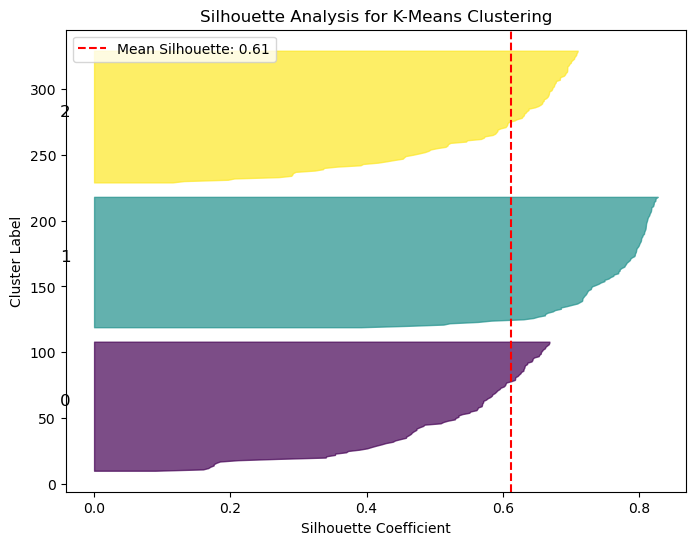

In [ ]:
# Import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs

# Generate sample data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, n_init=10)
labels = kmeans.fit_predict(X)

# Compute overall Silhouette Score
overall_silhouette = silhouette_score(X, labels)

# Compute Silhouette Scores for individual points
silhouette_vals = silhouette_samples(X, labels)

# Create a consistent color map based on cluster labels
unique_labels = np.unique(labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Create a dictionary to map cluster labels to colors
color_dict = {label: color for label, color in zip(unique_labels, colors)}

# Plot K-Means Clustering Results with consistent colors
fig, ax = plt.subplots(figsize=(8, 6))
for label in unique_labels:
    ax.scatter(X[labels == label, 0], X[labels == label, 1], color=color_dict[label], 
               alpha=0.7, edgecolors='k', label=f'Cluster {label}')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, 
           marker='X', label='Centroids')
ax.set_title("K-Means Clustering Results")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.show()

# Plot Silhouette Analysis with consistent colors
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for label in unique_labels:  # Iterate through each cluster
    cluster_silhouette_vals = silhouette_vals[labels == label]
    cluster_silhouette_vals.sort()
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, 
                     facecolor=color_dict[label], edgecolor=color_dict[label], alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(label), fontsize=12)
    y_lower = y_upper + 10  # Add space between clusters

ax.axvline(overall_silhouette, color="red", linestyle="--", label=f"Mean Silhouette: {overall_silhouette:.2f}")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster Label")
ax.set_title("Silhouette Analysis for K-Means Clustering")
ax.legend()
plt.show()
